# Evaluar el modelo

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#import tensorflow as tf
# Para que funcione con la version 2 instalada
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

session = tf.Session()

Instructions for updating:
non-resource variables are not supported in the long term


### Caso de regresión

In [4]:
x_vals = np.random.normal(1.0, 0.1, 200)
y_vals = np.repeat(10.0, 200)

x_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)

batch_size = 25

In [6]:
# Separo los datos, obtengo el %80 de los datos
train_idx = np.random.choice(len(x_vals), size=round(len(x_vals)*0.8),replace=False) # rep=F->Que los datos no esten repetidos

In [7]:
train_idx

array([194,  22,  68, 126,   2,   9, 144, 103, 181,  46, 132,  20, 128,
       188, 166,  59,  93, 173,  88,  87,  24,  25, 164,  85, 100, 148,
        14,   8, 102, 113, 147, 120,  44,  34, 180,  61, 187,  10, 171,
        89,  18, 140, 146,  79,  71, 189, 154, 137, 163, 135,  16, 156,
        37,  17, 109, 177, 191,  96,  92,   1,  45,  32,  51, 165,   3,
        98,  97,  48, 186, 170, 168, 121, 153,  35,  11,  13, 175,  39,
       172,  36,  78,  49,  27, 145, 162, 110,   4, 142,  82,  55, 149,
       141, 123,  29, 184, 192, 159,  15, 176,  95, 117, 150, 174, 182,
       178, 197, 185,  64, 138,  26, 131, 106, 111, 157,  43,  91, 129,
       116,  84,  33, 155, 130, 122,  54, 183, 101,  75, 139,  99, 152,
       151, 115,  38, 118, 124, 198,  73, 108, 127, 193,  69, 134,  66,
        21,  80,  28,  81,  23, 196,  50, 107, 136,  62, 190, 167,  65,
        74,  86,  19, 161])

In [8]:
# Todos los originales salvo los que he usado para entrenar
test_idx = np.array(list(set(range(len(x_vals)))-set(train_idx)))

In [9]:
test_idx

array([  0,   5,   6,   7, 133,  12, 143,  30,  31, 158, 160,  40,  41,
        42, 169,  47, 179,  52,  53,  56,  57,  58,  60,  63,  67, 195,
        70, 199,  72,  76,  77,  83,  90,  94, 104, 105, 112, 114, 119,
       125])

In [11]:
x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]
A = tf.Variable(tf.random_normal(shape=[1,1]))

In [12]:
my_prediction = tf.matmul(x_data, A) # x * A
loss = tf.reduce_mean(tf.square(my_prediction-y_target)) # media{[(x * A)-y]^2}
# Media porque estoy usando un entrenamiento por bloques

my_optim = tf.train.GradientDescentOptimizer(learning_rate=0.02)
train_step = my_optim.minimize(loss)
init = tf.global_variables_initializer()
session.run(init)

In [13]:
for i in range(200):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = np.transpose([x_vals_train[rand_idx]])
    rand_y = np.transpose([y_vals_train[rand_idx]])
    session.run(train_step, feed_dict={x_data : rand_x, y_target: rand_y})
    if (i+1)%20==0:
        print('Paso #'+str(i+1)+ ", A="+str(session.run(A))+", Loss ="+
              str(session.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})))

Paso #20, A=[[5.728388]], Loss =19.447838
Paso #40, A=[[8.077628]], Loss =4.2627354
Paso #60, A=[[9.045555]], Loss =1.5435601
Paso #80, A=[[9.524061]], Loss =0.9467378
Paso #100, A=[[9.742328]], Loss =0.9519158
Paso #120, A=[[9.834223]], Loss =0.7913941
Paso #140, A=[[9.886538]], Loss =0.51199704
Paso #160, A=[[9.90161]], Loss =0.9487323
Paso #180, A=[[9.841468]], Loss =0.80066454
Paso #200, A=[[9.850262]], Loss =0.69994813


#### Evaluación del modelo con MSE

In [14]:
# Evaluacion del modelo, R cuadrado de error

# R^2 medio para los datos de entrenamiento
mse_train = session.run(loss, feed_dict={x_data: np.transpose([x_vals_train]), y_target: np.transpose([y_vals_train])})

# R^2 medio para los datos de prueba
mse_test = session.run(loss, feed_dict={x_data: np.transpose([x_vals_test]), y_target: np.transpose([y_vals_test])})

# Logicamente va a tirar un valor minimo y mejor el conjuno de entrenamiento,
# el modelo se ha entrenado con esos datos
# en cambio los datos de test es la primera vez que los ve
# cero siempre es el mejor valor
print("MSE en el conjunto de entrenamiento "+str(np.round(mse_train, 3))) # me equivoco 0.9 arriba o abajo del conjuto de datos
print("MSE en el conjunto de testing "+str(np.round(mse_test, 3))) # me equivoco 1.2 arriba o abajo del conjuto de datos

MSE en el conjunto de entrenamiento 0.907
MSE en el conjunto de testing 1.193


### Caso de clasificación

In [3]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [4]:
batch_size = 25
x_vals = np.concatenate((np.random.normal(-2,1,100), np.random.normal(2,1,100)))
y_vals = np.concatenate((np.repeat(0.0, 100), np.repeat(1.0,100)))

x_data = tf.placeholder(shape=[1,None], dtype=tf.float32)
y_target = tf.placeholder(shape=[1,None], dtype = tf.float32) # variable que quiero predecir

In [5]:
train_idx = np.random.choice(len(x_vals), size=round(len(x_vals)*0.8), replace=False)
test_idx = np.array(list(set(range(len(x_vals)))-set(train_idx)))

In [6]:
# definimos valores de entrenamiento y de evaluacion
x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]
A = tf.Variable(tf.random_normal(mean=10, shape=[1]))

In [7]:
my_prediction = tf.add(x_data, A)
init = tf.global_variables_initializer()
session.run(init)

In [8]:
xentropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=my_prediction, labels=y_target))
my_optim = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train_step = my_optim.minimize(xentropy)

In [9]:
for i in range(2000):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = [x_vals_train[rand_idx]]
    rand_y = [y_vals_train[rand_idx]]
    session.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    if(i+1)%100==0:
        print("Paso #"+str(i+1)+", A = "+str(session.run(A))+
             "Loss = "+str(session.run(xentropy, feed_dict={x_data: rand_x, y_target:rand_y})))

Paso #100, A = [8.001787]Loss = 3.0112307
Paso #200, A = [5.536471]Loss = 1.5443978
Paso #300, A = [3.3923032]Loss = 1.0396466
Paso #400, A = [1.8814971]Loss = 0.48212796
Paso #500, A = [1.0808771]Loss = 0.15162057
Paso #600, A = [0.6108774]Loss = 0.16501684
Paso #700, A = [0.34649146]Loss = 0.19005133
Paso #800, A = [0.18429197]Loss = 0.21039425
Paso #900, A = [0.08938137]Loss = 0.11071829
Paso #1000, A = [0.04381103]Loss = 0.17865905
Paso #1100, A = [0.03315266]Loss = 0.24500513
Paso #1200, A = [0.01190491]Loss = 0.2307674
Paso #1300, A = [-0.00117244]Loss = 0.14828745
Paso #1400, A = [0.02654398]Loss = 0.17797953
Paso #1500, A = [0.03554539]Loss = 0.24828573
Paso #1600, A = [0.01818659]Loss = 0.14414352
Paso #1700, A = [0.00660027]Loss = 0.13795623
Paso #1800, A = [-0.00921775]Loss = 0.1627726
Paso #1900, A = [0.0144139]Loss = 0.17430018
Paso #2000, A = [0.03110586]Loss = 0.2053569


#### Evaluar el modelo con la precisión (Accuracy)

In [10]:
y_prediction = tf.squeeze(tf.round(tf.nn.sigmoid(tf.add(x_data, A))))
correct_prediction = tf.equal(y_prediction, y_target)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [11]:
acc_train = session.run(accuracy, feed_dict={x_data:[x_vals_train], y_target: [y_vals_train]})
acc_test = session.run(accuracy, feed_dict={x_data:[x_vals_test], y_target: [y_vals_test]})

In [12]:
print("Precisión en el conjunto de entrenamiento: "+str(acc_train))
print("Precisión en el conjunto de testing: "+ str(acc_test))

Precisión en el conjunto de entrenamiento: 0.975
Precisión en el conjunto de testing: 1.0


#### Visualización de los modelos

In [13]:
A_result = session.run(A)
A_result

array([0.03110586], dtype=float32)

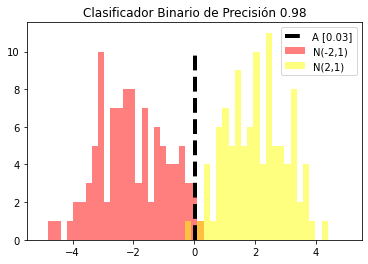

In [14]:
bins = np.linspace(-5,5,50)
plt.hist(x_vals[0:100], bins, alpha=0.5, label = "N(-2,1)", color="red")
plt.hist(x_vals[100:200], bins, alpha=0.5, label="N(2,1)", color="yellow")
plt.plot((A_result, A_result), (0, 10), "k--", linewidth = 4, label = "A "+str(np.round(A_result,2)))
plt.legend(loc="upper right")
plt.title("Clasificador Binario de Precisión "+str(np.round(acc_train,2)))
plt.show()